# Classical Featurization


In this notebook, we explore the wide array of classical image filters availible on scikit-image. For each filter, we analyze  it's underlying methods, run time and the resulting image. We then provide an explaination of whether or not the filter is included in the classifcal featurization functions of segmentify. For segmentify, we look for featurizers that provide the most information from the original image, as well as fast run time when featurizing.

## Read in example image

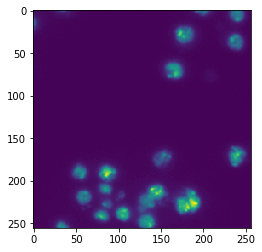

In [1]:
%matplotlib inline
%gui qt5
from skimage import feature
import napari
import numpy as np
import skimage
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

image = np.load("nucleis.npy")[:,:,0]
plt.imshow(image)

## List of filters availible on skimage
- [Gaussian](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian)
- [Sobel](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.sobel)
- [Scharr](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.scharr)*
- [Prewitt](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.prewitt)*
- [Roberts](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.roberts)*
- [Laplace](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.laplace)
- [Gabor](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gabor)
- [Hessian](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.hessian)*
- [Canny](https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.canny)

\* starred filters are not used in the final segmentify featurizer

### Gaussian
Gaussian filtering is used to blur images and remove noise and details. It's function is the following: 
    $G(x)=\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{x^{2}}{2\sigma^{2}}}$

Timing: ~2ms

Standard deviation $\sigma$ can be adjusted to increase the blurriness of the image.

| Original | Gaussian 2 | Gaussian 4 | Gaussian 6 | 
| --- | --- | --- | --- |
| ![](figs/original.png) | ![](figs/gaussian2.png) | ![](figs/gaussian4.png) | ![](figs/gaussian6.png) |

Gaussian filtering with sigma of 2 and 4 is used in segmentify. Sigma of 6 make the original too blurry, which can make it hard for the downstream classifier to detect edges

In [8]:
image_gaussian_2 = skimage.filters.gaussian(image,2)
image_gaussian_4 = skimage.filters.gaussian(image,4)

## Sobel
Sobel filtering is an edge detection algorithm that creates image emphasising edges. The operator uses kernels (similar to ones learned in convolutional neural networks) to convolve the original image and calculate the approximations of derivatives.

Timing: ~4ms

Standard deviation $\sigma$ can be adjusted to increase the blurriness of the image.

| Original | Sobel |
| --- | --- |
| ![](figs/original.png) |  ![](figs/sobel.png) |

Sobel filter with default settings is used in segmentify

In [9]:
image_soble = skimage.filters.sobel(image)

## Scharr
Scharr filtering is also an edge detection algorihm using the image's first derivative The performance is very similar to Sobel filters. 

| Original | Sobel |
| --- | --- |
| ![](figs/original.png) |  ![](figs/scharr.png) |

Due to similar performance as Sobel, Scharr is **not** used in segmentify

In [7]:
image_scharr = skimage.filters.scharr(image)

## Prewitt
Scharr filtering another discrete differentiation edge detector that approximates the gradient of the image intensity function.

| Original | Prewitt |
| --- | --- |
| ![](figs/original.png) |  ![](figs/prewitt.png) |

Due to similar performance as Sobel, Prewitt is **not** used in segmentify

In [8]:
image_prewitt = skimage.filters.prewitt(image)

## Roberts
Roberts cross is yet another edge detector that approximates the gradients of an image through discrete differentiation. 

| Original | Roberts |
| --- | --- |
| ![](figs/original.png) |  ![](figs/roberts.png) |

Due to similar performance as Sobel, Roberts is **not** used in segmentify

In [9]:
image_roberts = skimage.filters.roberts(image)

## Laplace
The laplace operator is another edge detector. Unlike sobel, lapacian edge detector uses one kernel and calculates the second order derivatives in a single pass.

| Original | Laplace_3 | Laplace_4 | Laplace_5 |
| --- | --- | --- | --- | 
| ![](figs/original.png) |  ![](figs/laplace_3.png) | ![](figs/laplace_4.png) | ![](figs/laplace_5.png) |

Timing: ~1ms

Since the different filter sizes (3,4,5) didn't seem to make a big difference in the output image, only laplace with filter size 3 is used for segmentify

In [10]:
image_laplace_3 = skimage.filters.laplace(image, 3)
image_laplace_4 = skimage.filters.laplace(image, 4)
image_laplace_5 = skimage.filters.laplace(image, 5)

## Gabor 
Gabor is a linear filter used for texture analysis that uses the product of a sinusoid and a Gaussian.

$g(x,y;\lambda,\theta,\phi,\gamma) = \exp\bigg(-\frac{x'^2+\gamma^2 y'^2}{2\sigma^2}\bigg) \exp\bigg(i(2\pi\frac{x'}{\lambda} + \phi)\bigg)$

where 

$x = x\cos\theta + y\sin\theta$

$y = -x\sin\theta + y\cos\theta$

Since the gabor filter returns a complex number, it can be seperated into a real and imaginary component.

The ratio $\sigma/\lambda$ defines an adjustable frequency parameter:

| Original | 0.1_real | 0.6_real | 0.6_img | 0.9_real | 0.9_img |
| --- | --- | --- | --- |  --- | --- | 
| ![](figs/original.png) |  ![](figs/gabor_0.1_real.png) | ![](figs/gabor_0.6_real.png) | ![](figs/gabor_0.6_img.png) | ![](figs/gabor_0.9_real.png) | ![](figs/gabor_0.9_img.png) |


With a frequency of 0.9, the featurized image looks almost identical to the original input, while a low frequency of 0.1 cause the output to be very blurry. Therefore, only the real and imaginary component with a frequency of 0.6 is used by Segmentify.

In [11]:
image_gabor_06_real = skimage.filters.gabor(image, 0.6)[0]
image_gabor_06_img = skimage.filters.gabor(image, 0.6)[1]

## Hessian
Hessian is an affine region detector that search for strong derivatives in two orthogonal directions. This filter is meant to look detect corners and strong textured areas.

| Original | Hassian | 
| --- | --- |
| ![](figs/original.png) |  ![](figs/hassian.png) | 

Timing: 67.2ms

Based on the output shown above, Hessian filter seems to produce some extra artifects even in areas where cells are not observed in the original image. Fearing that this will introduce some noise during segmentation, adding on the long run time for this filter, Hessian is **not** included in Segmentify.

In [12]:
image_hessian = skimage.filters.hessian(image)

## Canny

The Canny filter is a multi-stae edge detector. It first uses the derivative of a Gaussian to compute the intensity of the gradients to reduce the noise in the image. It then thins down potential edges by removing non-maximum pixels of the gradient magnitude. Lastly, the edges are filered based on a threshold. Sigma is an adjustable parameter for the Canny fiter when it computes it's gaussian.

| Original | Canny_0.5 | Canny_1.0 | Canny_2.0 | 
| --- | --- | --- | --- |
| ![](figs/original.png) | ![](figs/canny_0.5.png) | ![](figs/canny_1.0.png) | ![](figs/canny_2.0.png) | 

Timing: 25ms

Sigma of 0.5 introduces some unwanted edges within the cells, while sigma of 2.0 prodces boarders around the cells with a lot of openings. Therefore, only canny detector with sigma of 1.0 is used in Segmentify.

In [13]:
image_canny = feature.canny(image, 1,0)

## Final featurizer

To summerize, the classic featurization in segmentify uses the following filters: 
- The original image
- Gaussian 2
- Gaussian 4
- Sobel
- Laplace
- Gabor 0.6 real
- Gabor 0.6 imaginary 
- Canny 1.0

To visualize the output features, run the following cell:

In [14]:
features = np.concatenate([[image],
                           [skimage.filters.gaussian(image,2)],
                           [skimage.filters.gaussian(image,4)],
                           [skimage.filters.sobel(image)],
                           [skimage.filters.laplace(image)],
                           [skimage.filters.gabor(image, 0.6)[0]],
                           [skimage.filters.gabor(image, 0.6)[1]],
                           [feature.canny(image, 1,0)]], axis=0)
viewer = napari.view(features)

## Result 

We use the following steps to evaluate our featurizers:
- Featurize all images (including train and test)
- Pick 20% of the pixels from the training data
- Train a Random Forest Classifier using the 20% selected pixels
- Predict binary segmentation on test set using trained RFC
- Remove small islands

Using this filter featurizer, we are able to obtain the results below. The x axis show the number of training examples used, and the y axis is the performance metric (IoU, precision).
    
![](./figs/filters_result.png)